In [1]:
# Load in libraries

import warnings
warnings.filterwarnings('ignore')

#libraries for handling data
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#libaries for modelling
# Regression Modelling Algorithms
import statsmodels.api as sm
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor


In [2]:
train = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - House Prices/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - House Prices/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
display(train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
all_data = pd.concat((train,test)).reset_index(drop=True)

In [6]:
test.shape

(1459, 80)

In [7]:
all_data.shape

(2919, 81)

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [9]:
all_data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

# handling null values

In [10]:
#all_data['PoolQC'] = all_data['PoolQC'].fillna("None")
#all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")
#all_data['Alley'] = all_data['Alley'].fillna("None")
#all_data['Fence'] = all_data['Fence'].fillna("None")
#all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna("None")
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    all_data[col] = all_data[col].fillna('None')

    
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in [ 'GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data[col] = all_data[col].fillna(int(0))
    
#all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].dropna().median(), inplace=True)
#all_data['building'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].dropna().median(), inplace=True)
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median))
all_data['LotArea'] = all_data.groupby('Neighborhood')['LotArea'].transform( lambda x: x.fillna(x.median))

all_data['Electrical'] = all_data['Electrical'].fillna(train['Electrical']).mode()[0]
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF']).mode()[0]

In [11]:
corr = train['SalePrice'].corr(train['YrSold'])
corr

-0.02892258516873034

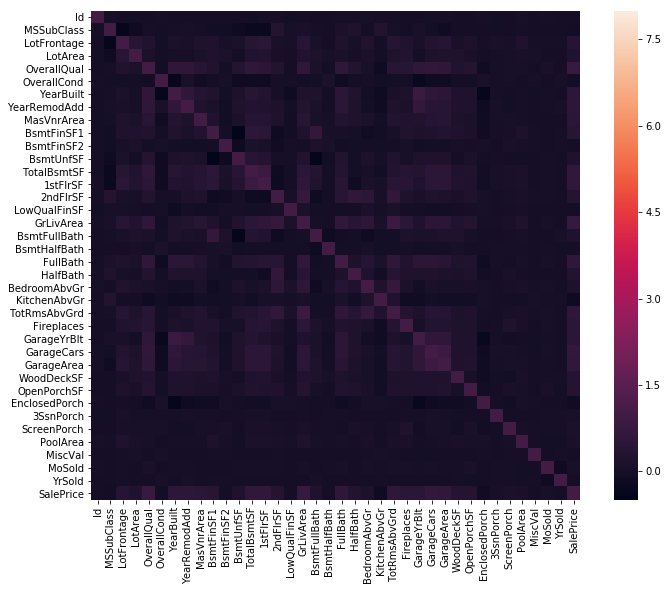

In [12]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 8, square =True)

# vectorization/ Encoding

In [13]:
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', \
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', \
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', \
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir']

for col in cols:
    print('{}: {}'.format(col, train[col].unique()))

FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
PoolQC: [nan 'Ex' 'Fa' 'Gd']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
GarageFinish: ['RFn' 'Unf' 'Fin' nan]
LandSlope: ['Gtl' 'Mod' 'Sev']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
PavedDrive: ['Y' 'N' 'P']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
CentralAir: ['Y' 'N']


In [14]:
all_data = all_data.replace({'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'PoolQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}, \
                 'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}, \
                 'Functional': {'Sel': 6, 'Sev': 5, 'Maj2': 4, 'Maj1': 3, 'Mod': 2, 'Min1': 1, 'Min2': 1, 'Typ': 0}, \
                 'BsmtExposure': {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'None': 0}, \
                 'Fence': {'GdPrv': 2, 'GdWo': 2, 'MnPrv': 1, 'MnWw': 1, 'None': 0}, \
                 'GarageFinish': {'Fin': 3, 'Unf': 2, 'RFn': 1, 'None': 0}, \
                 'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0}, \
                 'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}, \
                 'PavedDrive': {'Y': 2, 'P': 1, 'N': 0}, \
                 'Street': {'Pave': 1, 'Grvl': 0}, \
                 'Alley': {'Pave': 2, 'Grvl': 1, 'None': 0}, \
                 'CentralAir': {'Y': 1, 'N': 0}})

# CHECK RELEVANT X-VARIABLES

In [15]:
#corr = train.corr()#['SalePrice']
#corr = corr.loc[:,['SalePrice']]
#corr.sort_values(by='SalePrice', ascending=False)#[:15]


corr = train.corr().sort_values(by='SalePrice', ascending=False)['SalePrice']
corr[:10] 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

# DATA PREPARATION. SCALING DATA

In [16]:
#from sklearn.preprocessing import MinMaxScaler
#train['SalePrice_robust_scale'] = preprocessing.robust_scale(train['SalePrice'])

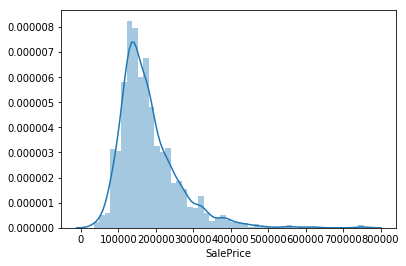

In [17]:
sns.distplot(train['SalePrice'])

In [18]:
year = train.set_index('YearBuilt')
year.index

Int64Index([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939,
            ...
            1974, 2008, 2005, 2006, 2004, 1999, 1978, 1941, 1950, 1965],
           dtype='int64', name='YearBuilt', length=1460)

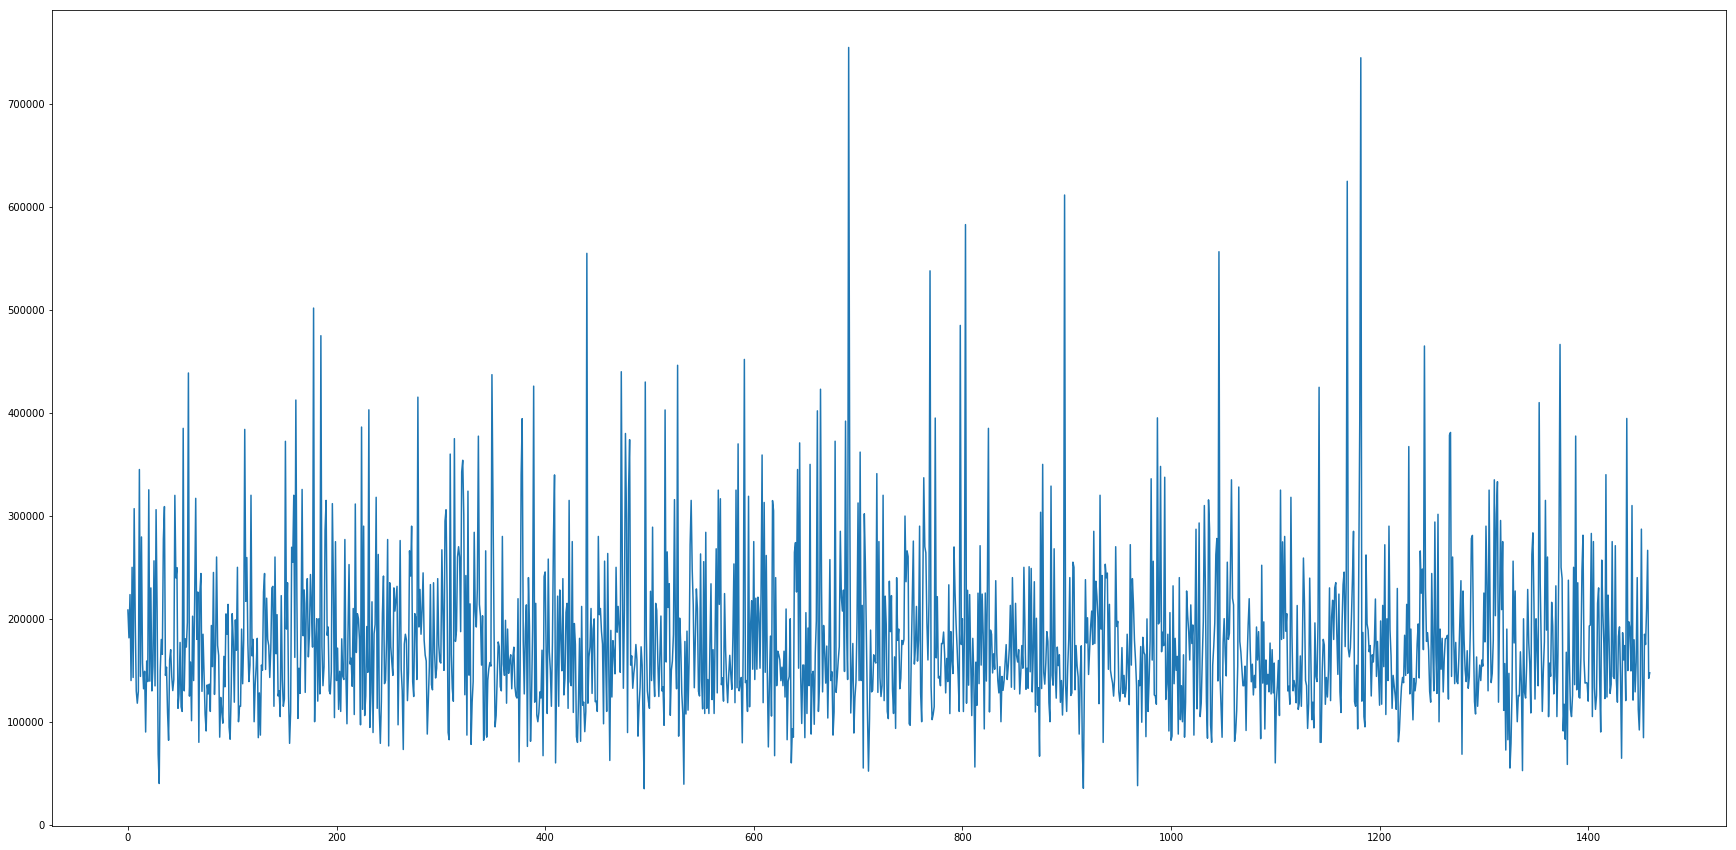

In [46]:
train['SalePrice'].plot(figsize=(30, 15))

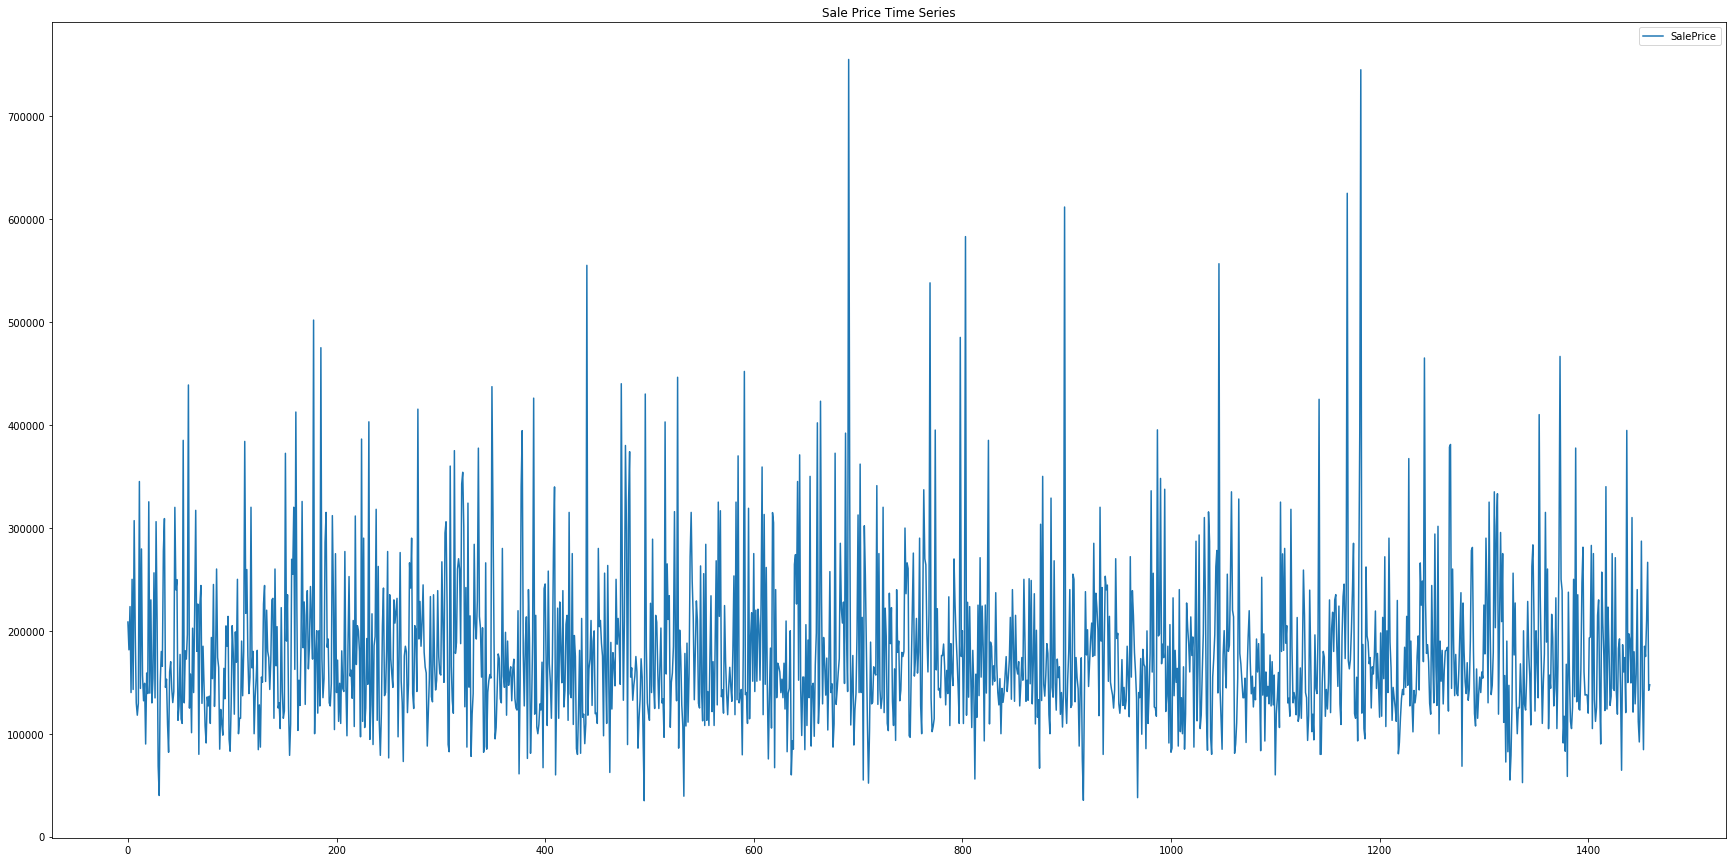

In [55]:
train.plot(y ='SalePrice', title='Sale Price Time Series', figsize=(30,15))#.groupby['GarageCars']

In [19]:
#from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler
#train['scaled_SalePrice']= preprocessing.scale(train['SalePrice'])
#scaled_SalePrice= StandardScaler().fit_transform(train[['SalePrice']])

In [20]:
#train['scaled_SalePrice'].head()

In [21]:
#train['scaled_LotArea']= preprocessing.scale(train['LotArea'])
#train['scaled_YrSold']= preprocessing.scale(train['YrSold'])
#train['scaled_OverallQual']= preprocessing.scale(train['OverallQual'])
#train['scaled_GarageCars']= preprocessing.scale(train['GarageCars'])

In [22]:
all_data[['OverallQual','GrLivArea', 'GarageCars', \
                     'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath',\
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' ]].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
dtype: int64

In [23]:
#X_train = StandardScaler().fit_transform(X_train)
#scaled_X = preprocessing.scale(all_data[['GrLivArea', 'LotArea', 'YrSold', 'OverallQual', 'GarageCars']])
#scaled_X = StandardScaler().fit_transform(all_data[['GrLivArea', 'LotArea', 'YrSold', 'OverallQual', 'GarageCars']])


scaled_X = scaler.fit_transform(all_data[['OverallQual','GrLivArea', 'GarageCars', \
                     'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath',\
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' ]])

scaled_SalePrice= scaler.fit_transform(train[['SalePrice']])

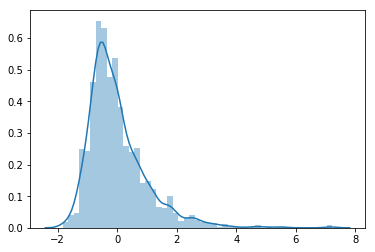

In [24]:
sns.distplot(scaled_SalePrice)

In [25]:
test.shape

(1459, 80)

In [26]:
train.shape

(1460, 81)

In [27]:
#df_all_data = all_data.loc[:,('OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
#                       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
#                      'YearBuilt', 'YearRemodAdd')]

In [28]:
x_train = scaled_X[0:1460]
y_train = scaled_SalePrice
x_test = scaled_X[1460::]

In [29]:
x_test.shape

(1459, 11)

In [30]:
x_train.shape

(1460, 11)

In [31]:
#linear regression
#lm = LinearRegression()
#lm.fit(x_train, y_train)
#y_pred_lm = lm.predict(x_test)
#lm.score(x_train, y_train) 


lm = sm.OLS(y_train, x_train).fit() ## sm.OLS(output, input)
y_pred_lm = lm.predict(x_test)

# Print out the statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     492.8
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:36:31   Log-Likelihood:                -990.35
No. Observations:                1460   AIC:                             2001.
Df Residuals:                    1450   BIC:                             2054.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3717      0.021     18.000      0.000       0.331       0.412
x2             0.3260      0.027     12.066      0.000       0.273       0.379
x3             0.1276      0.031      4.161      0.000       0.067       0.188
x4             0.0638      0.028      2.268      0.023       0.009       0.119
const      -5.689e-17   1.25e-17     -4.552      0.000   -8.14e-17   -3.24e-17
x5             0.1469      0.017      8.890      0.000       0.114       0.179
x6            -0.0613      0.019     -3.281      0.001      -0.098      -0.025
x7            -0.0116      0.022     -0.526      0.599      -0.055       0.032
x8             0.1163      0.019      6.123      0.000       0.079       0.153
x9             0.0685      0.017      4.070      0.000       0.035       0.101
x10           -0.0647      0.016     -4.019      0.000      -0.096      -0.033
==============================================================================
Omnibus:                      412.498   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40294.619
Skew:                          -0.082   Prob(JB):                         0.00
Kurtosis:                      28.736   Cond. No.                     3.53e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.77e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
#random forest regression
randomForest = RandomForestRegressor()
randomForest.fit(x_train, y_train)
y_pred_randomForest = randomForest.predict(x_test)
randomForest.score(x_train, y_train) 

0.9662434860523504

In [33]:
#support vector regression
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
svr.score(x_train, y_train) 

0.8784140806513346

In [34]:
#gradient boosting regression
gradientBoosting = GradientBoostingRegressor()
gradientBoosting.fit(x_train, y_train)
y_pred_gradBoost = gradientBoosting.predict(x_test)
gradientBoosting.score(x_train, y_train)

0.9290825035262732

In [35]:
y_pred_gradBoost

array([-0.71518742, -0.49831014, -0.20377281, ..., -0.35930642,
       -0.79970146,  0.875788  ])

In [36]:
y_new_inverse = scaler.inverse_transform(y_pred_gradBoost)

In [37]:
y_new_inverse

array([124124.37791619, 141347.75052212, 164738.51840776, ...,
       152386.77179827, 117412.6711849 , 250472.15571399])

In [38]:
Id = test['Id']
result = pd.DataFrame( { 'Id': Id , 'SalePrice': y_new_inverse} )
result.shape
result.head()
result.to_csv( 'submission.csv' , index = False )